Data ready

Meilleurs hyperparamètres: 
 {'max_depth': 16, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 5}

Score = 
 0.327516810092657

Importance des caractéristiques : 
 [0.1121034  0.04511847 0.0423759  0.04866665 0.04363856 0.0724183
 0.04486586 0.08254137 0.01937976 0.04518916 0.070429   0.05618521
 0.04414796 0.03278557 0.05974593 0.0437612  0.1366477 ]


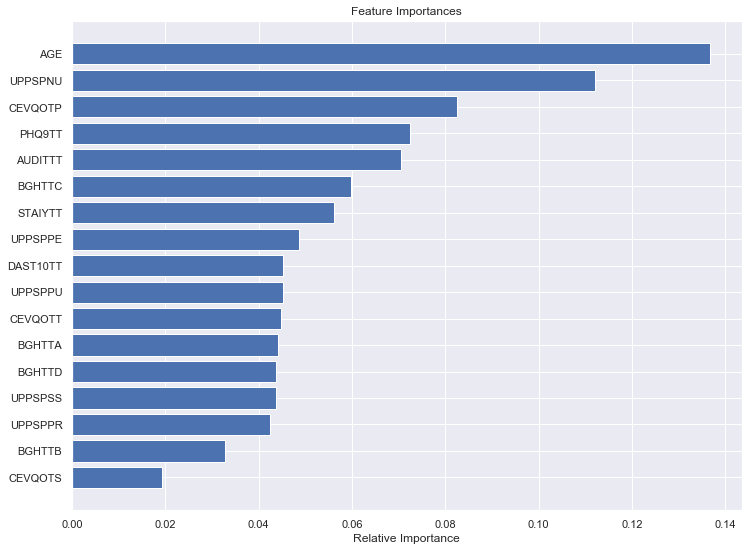



 Analyse terminée


In [26]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.ensemble import RandomForestClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import f1_score, make_scorer

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
# Retirer les lignes comportant des données manquantes
data = data.dropna()

features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE']

X = data.loc[:, features_cols]
y = data['CIMDX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model_forest = RandomForestClassifier()

# Définir les hyperparamètres
hyperparams_forest = {'n_estimators':[5], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}


cv_folds = StratifiedKFold(n_splits=3, random_state=42)

scoring = make_scorer(f1_score , average='macro')

cv_valid = GridSearchCV(estimator=model_forest, param_grid=hyperparams_forest, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)
print('\nImportance des caractéristiques : \n', model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print("\n\n Analyse terminée")

<img src="./img/Cours_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RD_0.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_5.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_6.svg" alt="Drawing" style="width: 2000px;"/>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE']
X = data.loc[:, features_cols]
scaler = StandardScaler()
X = scaler.fit_transform(X)


pca = PCA(n_components=17)
principalComponents = pca.fit_transform(X)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', \
                                                                        'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'])


print(pca.components_)
print(pca.explained_variance_)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
pc_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
plt.bar(x= range(1,18), height=percent_variance, tick_label=pc_columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de sélection de données
from sklearn.feature_selection import VarianceThreshold

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Noms des colonnes correspondant aux caractéristiques et à la cible
features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

pca = PCA(n_components=9)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#principalDataframe = pd.DataFrame(data = X_train_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

print(pca.components_)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
pc_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
plt.bar(x= range(1,10), height=percent_variance, tick_label=pc_columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de sélection de données
from sklearn.feature_selection import VarianceThreshold

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Noms des colonnes correspondant aux caractéristiques et à la cible
features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# On effectue la PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
pc_columns = ['PC1', 'PC2', 'PC3']
plt.bar(x= range(1,4), height=percent_variance, tick_label=pc_columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = DecisionTreeClassifier()

# Définir les hyperparamètres
hyperparams = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train_pca, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train_pca,y_train)

In [ ]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test_pca)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)

# t-SNE

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE']

X = data.loc[:, features_cols]
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2).fit_transform(X)

print(X_embedded.shape)

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

<img src="./img/R_0.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_3.svg" alt="Drawing" style="width: 2000px;"/>

[[78 55 32]
 [97  9 17]
 [22  1  2]]

MESURES EXTERNES

ARI :  0.011853735804335677
AMI :  0.0747055128422838
Homogénéité :  0.08200842979074074
Complétude :  0.08137678236122067
Mesure v :  0.08137678236122067
Fowlkes-Mallows :  0.45681588984716687


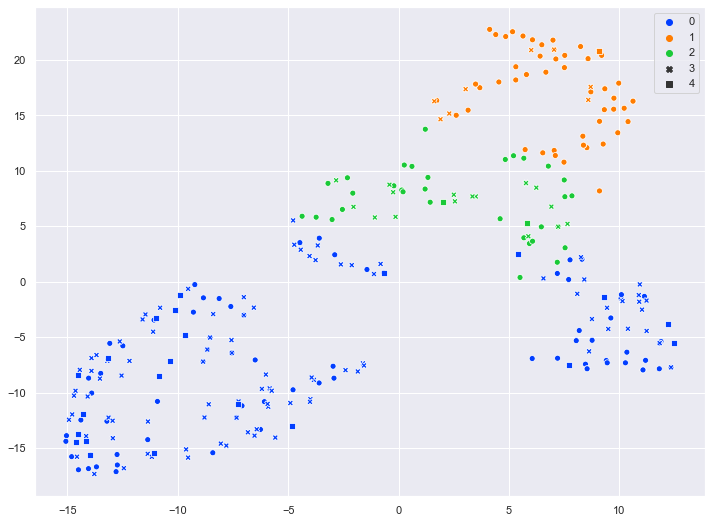

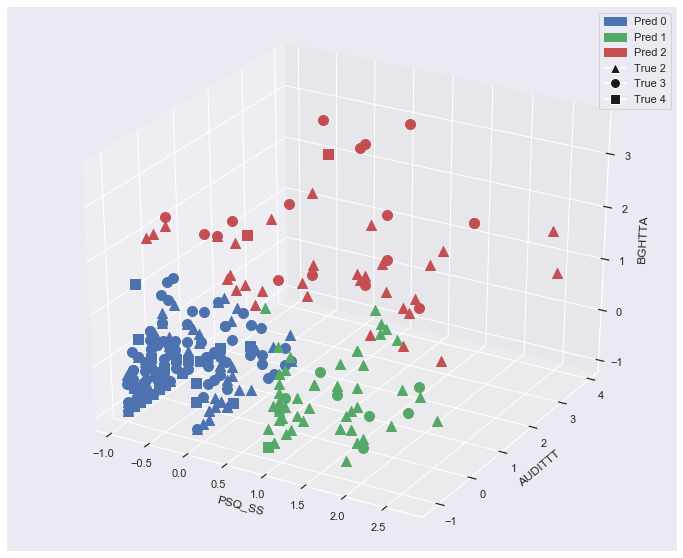

In [32]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import KMeans

# Importer des métriques permettant d'évaluer le algorithmes
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------


# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['PSQ_SS', 'AUDITTT', 'BGHTTA']

X = data.loc[:, features_cols]
y = data['CIMDX']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 3

#X_PCA = PCA(n_components=3).fit_transform(X)
model = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=1e-04, random_state=0)
model.fit(X)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

# Mesures externes
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
AMI = metrics.adjusted_mutual_info_score(labels_true, labels_pred)  
homogeneity = metrics.homogeneity_score(labels_true, labels_pred) 
completeness = metrics.completeness_score(labels_true, labels_pred) 
v_measure = metrics.completeness_score(labels_true, labels_pred) 
FM = metrics.fowlkes_mallows_score(labels_true, labels_pred)  

print(metrics.cluster.contingency_matrix(labels_true, labels_pred))

print('\nMESURES EXTERNES\n')
print('ARI : ', ARI)
print('AMI : ', AMI)
print('Homogénéité : ', homogeneity)
print('Complétude : ', completeness)
print('Mesure v : ', v_measure)
print('Fowlkes-Mallows : ', FM)


# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)


# Graphique 3D
true_markers = ['^','o','s']
pred_colors = ['b','g','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i,0],X[i,1],X[i,2], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

ax.set_xlabel(features_cols[0])
ax.set_ylabel(features_cols[1])
ax.set_zlabel(features_cols[2])
legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='g', edgecolor='g', label='Pred 1'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 2'),
                   Line2D([0], [0], marker='^', color='w', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='True 3', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='True 4', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)

<img src="./img/KM_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_5.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_6.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_7.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_8.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_9.svg" alt="Drawing" style="width: 2000px;"/>

Automatically created module for IPython interactive environment

KMEANS

Matrice de contingence  1  : 
 [[373 377]
 [374 376]]

Matrice de contingence  2  : 
 [[119 631]
 [642 108]]

Matrice de contingence  3  : 
 [[500   0]
 [500   0]
 [  0 500]]

Matrice de contingence  4  : 
 [[774 726]]


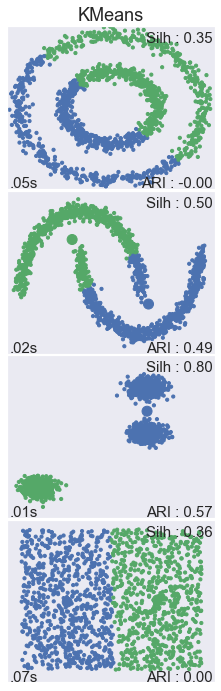

In [19]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(1500,)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


clustering_names = ['KMeans']

plt.figure(figsize=(len(clustering_names) * 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]

print('\nKMEANS')
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    kmeans = cluster.KMeans(n_clusters=2)
    
    clustering_algorithms = [kmeans]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        silhouette = metrics.silhouette_score(X, y_pred)
        print('\nMatrice de contingence ', i_dataset+1, ' : \n', metrics.cluster.contingency_matrix(y, y_pred))
        ARI = metrics.adjusted_rand_score(y, y_pred)
        
        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .9, ('Silh : %.2f' % silhouette),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.text(.99, .01, ('ARI : %.2f' % ARI),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='left')
        plot_num += 1

plt.show()

Silhouette :  0.3403594066370058
ARI :  0.04625144834680746
[[ 3  6  1  2  0  0]
 [26 27 13 57 33  9]
 [27 18 25 19 14 20]
 [ 8  7  6  2  1  1]
 [ 1 29  3  6  3  0]
 [ 0  0  3  1  1  0]]


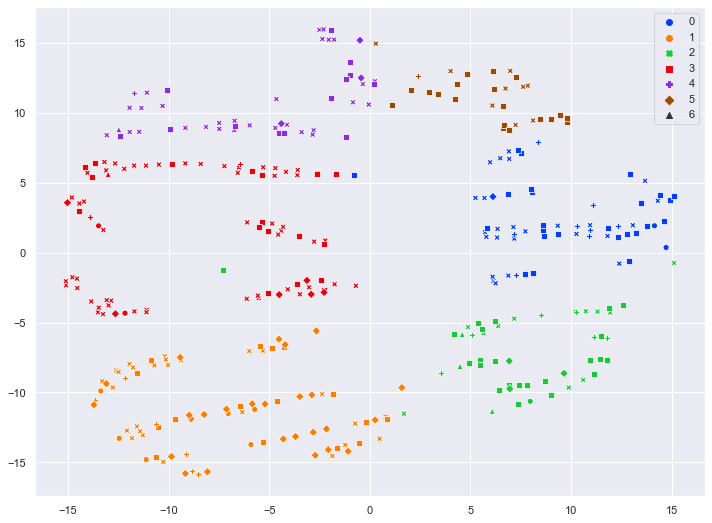

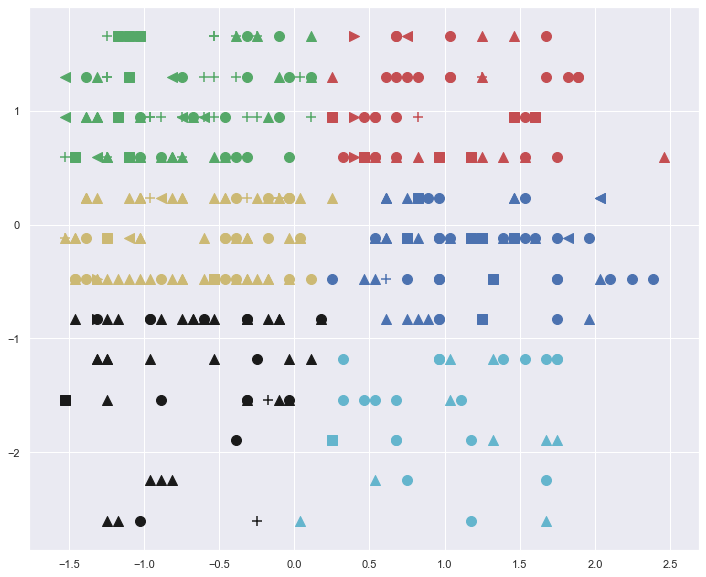

In [31]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import KMeans

# Importer des métriques permettant d'évaluer le algorithmes
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------


# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

features_cols = ['AGE', 'UPPSPNU']

X = data.loc[:, features_cols]
y = data['CIMDX']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 6

model = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=1e-04, random_state=0)
model.fit(X)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

# Mesures de validation
Silhouette = metrics.silhouette_score(X, labels_pred)
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
print('Silhouette : ', metrics.silhouette_score(X, labels_pred))
print('ARI : ', ARI)
print(metrics.cluster.contingency_matrix(labels_true, labels_pred))


# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)


# Graphique
true_markers = ['^','o','s','+','>','<']
pred_colors = ['b','g','r','y','k','c']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(X.shape[0]):
    ax.scatter(X[i,0],X[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)



<img src="./img/DM_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DM_2.svg" alt="Drawing" style="width: 2000px;"/>

In [ ]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(1500,)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


clustering_names = ['KMeans', 'MeanShift']

plt.figure(figsize=(len(clustering_names) * 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]

for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    kmeans = cluster.KMeans(n_clusters=2)
    
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    clustering_algorithms = [kmeans, ms]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        if np.max(y_pred) != 0:
            silhouette = metrics.silhouette_score(X, y_pred)
        ARI = metrics.adjusted_rand_score(y, y_pred)
        
        if name == 'MeanShift':
            print('\n', name, ', matrice de contingence ', i_dataset+1, ' : \n', \
                  metrics.cluster.contingency_matrix(y, y_pred))
        
        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        if np.max(y_pred) != 0:
            plt.text(.99, .9, ('Silh : %.2f' % silhouette),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
        plt.text(.99, .01, ('ARI : %.2f' % ARI),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='left')
        plot_num += 1

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import MeanShift, estimate_bandwidth

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'BGHTTA', 'PSQ_SS']

X = data.loc[:, features_cols]
y = data['CIMDX']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

#X_PCA = PCA(n_components=3).fit_transform(X)
bandwidth = estimate_bandwidth(X, quantile=0.1)

model = MeanShift(bandwidth=bandwidth, cluster_all=False)
model.fit(X)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

# Mesures externes
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
AMI = metrics.adjusted_mutual_info_score(labels_true, labels_pred)  
homogeneity = metrics.homogeneity_score(labels_true, labels_pred) 
completeness = metrics.completeness_score(labels_true, labels_pred) 
v_measure = metrics.completeness_score(labels_true, labels_pred) 
FM = metrics.fowlkes_mallows_score(labels_true, labels_pred)  

print(metrics.cluster.contingency_matrix(labels_true, labels_pred))

print('\nMESURES EXTERNES\n')
print('ARI : ', ARI)
print('AMI : ', AMI)
print('Homogénéité : ', homogeneity)
print('Complétude : ', completeness)
print('Mesure v : ', v_measure)
print('Fowlkes-Mallows : ', FM)

labels_unique = np.unique(labels_pred)
k = len(labels_unique)

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)


# Graphique 3D
true_markers = ['^','o','s']
pred_colors = ['b','g','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i,0],X[i,1],X[i,2], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

ax.set_xlabel(features_cols[0])
ax.set_ylabel(features_cols[1])
ax.set_zlabel(features_cols[2])
legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='g', edgecolor='g', label='Pred 1'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 2'),
                   Line2D([0], [0], marker='^', color='w', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='True 3', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='True 4', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)

<img src="./img/DB_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_4.svg" alt="Drawing" style="width: 2000px;"/>

Automatically created module for IPython interactive environment

 DBSCAN , matrice de contingence  1  : 
 [[750   0]
 [  0 750]]

 DBSCAN , matrice de contingence  2  : 
 [[  0 750]
 [750   0]]

 DBSCAN , matrice de contingence  3  : 
 [[500   0   0]
 [  0 500   0]
 [  0   0 500]]

 DBSCAN , matrice de contingence  4  : 
 [[1500]]


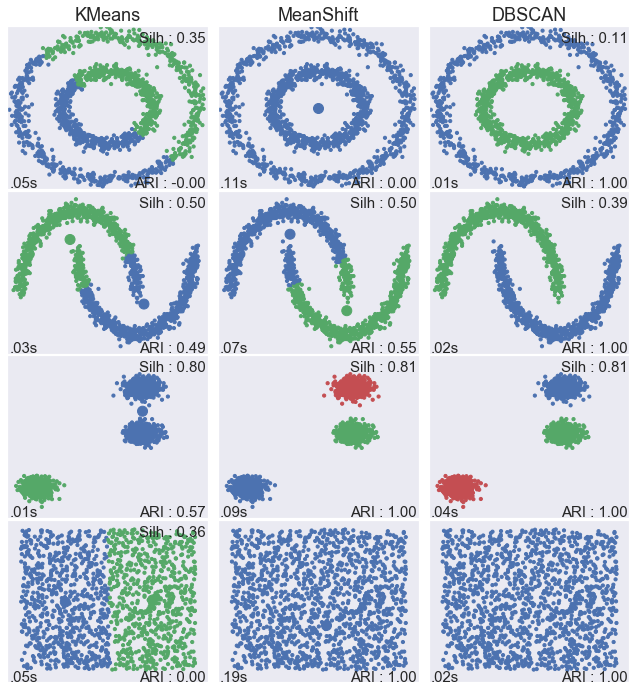

In [14]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(1500,)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


clustering_names = ['KMeans', 'MeanShift', 'DBSCAN']

plt.figure(figsize=(len(clustering_names) * 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]

for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    kmeans = cluster.KMeans(n_clusters=2)
    
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    dbscan = cluster.DBSCAN(eps=.3)
    
    clustering_algorithms = [kmeans, ms, dbscan]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        if np.max(y_pred) != 0:
            silhouette = metrics.silhouette_score(X, y_pred)
        ARI = metrics.adjusted_rand_score(y, y_pred)
        
        if name == 'DBSCAN':
            print('\n', name, ', matrice de contingence ', i_dataset+1, ' : \n', \
                  metrics.cluster.contingency_matrix(y, y_pred))
        
        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        if np.max(y_pred) != 0:
            plt.text(.99, .9, ('Silh : %.2f' % silhouette),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
        plt.text(.99, .01, ('ARI : %.2f' % ARI),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='left')
        plot_num += 1

plt.show()

[[102  42  17   4]
 [ 78  24  20   1]
 [ 17   3   5   0]]

MESURES EXTERNES

ARI :  -0.0056520597141163096
AMI :  0.0017859493829038614
Homogénéité :  0.013021258556249634
Complétude :  0.01229012474128298
Mesure v :  0.01229012474128298
Fowlkes-Mallows :  0.4458044232412948


"\n# Graphique 3D\ntrue_markers = ['^','o','s']\npred_colors = ['b','g','r']\n\nfig= plt.figure(figsize=(12,10))\nax = fig.add_subplot(111, projection='3d')\nfor i in range(X.shape[0]):\n    ax.scatter(X[i,0],X[i,1],X[i,2], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)\n\nax.set_xlabel(features_cols[0])\nax.set_ylabel(features_cols[1])\nax.set_zlabel(features_cols[2])\nlegend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),\n                   Patch(facecolor='g', edgecolor='g', label='Pred 1'),\n                   Patch(facecolor='r', edgecolor='r', label='Pred 2'),\n                   Line2D([0], [0], marker='^', color='w', label='True 2', markerfacecolor='k', markersize=10),\n                   Line2D([0], [0], marker='o', color='w', label='True 3', markerfacecolor='k', markersize=10),\n                   Line2D([0], [0], marker='s', color='w', label='True 4', markerfacecolor='k', markersize=10)]\nax.legend(handles=legend_elements)\n"

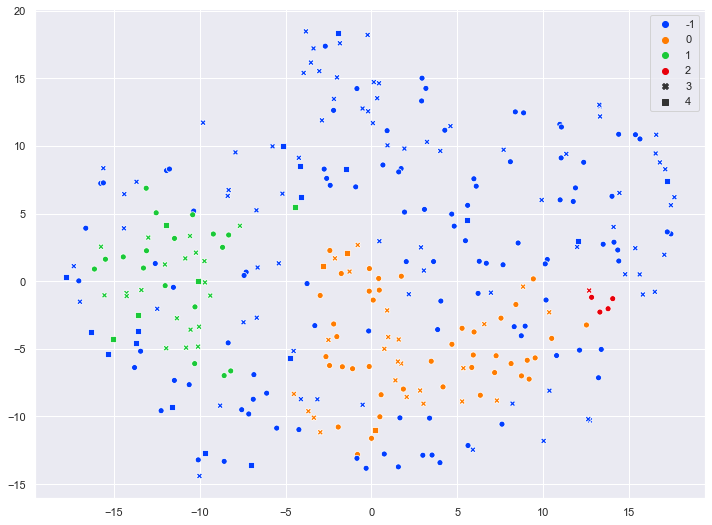

In [12]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import DBSCAN

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from sklearn import metrics

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD']

X = data.loc[:, features_cols]
y = data['CIMDX']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

X_PCA = PCA(n_components=10).fit_transform(X)
model = DBSCAN(eps=2, min_samples=5)
model.fit(X_PCA)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

# Mesures externes
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
AMI = metrics.adjusted_mutual_info_score(labels_true, labels_pred)  
homogeneity = metrics.homogeneity_score(labels_true, labels_pred) 
completeness = metrics.completeness_score(labels_true, labels_pred) 
v_measure = metrics.completeness_score(labels_true, labels_pred) 
FM = metrics.fowlkes_mallows_score(labels_true, labels_pred)  

print(metrics.cluster.contingency_matrix(labels_true, labels_pred))

print('\nMESURES EXTERNES\n')
print('ARI : ', ARI)
print('AMI : ', AMI)
print('Homogénéité : ', homogeneity)
print('Complétude : ', completeness)
print('Mesure v : ', v_measure)
print('Fowlkes-Mallows : ', FM)

labels_unique = np.unique(labels_pred)
k = len(labels_unique)


# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X_PCA)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)

"""
# Graphique 3D
true_markers = ['^','o','s']
pred_colors = ['b','g','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i,0],X[i,1],X[i,2], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

ax.set_xlabel(features_cols[0])
ax.set_ylabel(features_cols[1])
ax.set_zlabel(features_cols[2])
legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='g', edgecolor='g', label='Pred 1'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 2'),
                   Line2D([0], [0], marker='^', color='w', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='True 3', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='True 4', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

In [13]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import svm

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

# Données importées (X: caractéristiques, y: cible)
X = np.array(labels_pred).reshape(-1,1)
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = svm.SVC(kernel='linear')

# Définir les hyperparamètres
hyperparams = {'C':[.001, .001, .01, .1, 1, 10, 100, 1000]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'C': 1}

Score = 
 0.5145983645983645


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<img src="./img/MG_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_4.svg" alt="Drawing" style="width: 2000px;"/>

In [ ]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, mixture, datasets, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(1500,)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


clustering_names = ['KMeans', 'MeanShift', 'DBSCAN', 'GaussianMixture']

plt.figure(figsize=(len(clustering_names) * 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]

k = 2
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    kmeans = cluster.KMeans(n_clusters=k)
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    dbscan = cluster.DBSCAN(eps=.3)
    gm = mixture.GaussianMixture(n_components=k)
    
    clustering_algorithms = [kmeans, ms, dbscan, gm]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        if np.max(y_pred) != 0:
            silhouette = metrics.silhouette_score(X, y_pred)
        ARI = metrics.adjusted_rand_score(y, y_pred)
        
        if name == 'GaussianMixture':
            print('\n', name, ', matrice de contingence ', i_dataset+1, ' : \n', \
                  metrics.cluster.contingency_matrix(y, y_pred))
        
        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        if np.max(y_pred) != 0:
            plt.text(.99, .9, ('Silh : %.2f' % silhouette),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
        plt.text(.99, .01, ('ARI : %.2f' % ARI),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='left')
        plot_num += 1

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.mixture import GaussianMixture

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'BGHTTA', 'PSQ_SS']

X = data.loc[:, features_cols]

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 3

#X = PCA(n_components=2).fit_transform(X)
model = GaussianMixture(n_components=k)
model.fit(X)

labels_pred = model.predict(X)
labels_true = np.array(y.astype(int))

# Mesures externes
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
AMI = metrics.adjusted_mutual_info_score(labels_true, labels_pred)  
homogeneity = metrics.homogeneity_score(labels_true, labels_pred) 
completeness = metrics.completeness_score(labels_true, labels_pred) 
v_measure = metrics.completeness_score(labels_true, labels_pred) 
FM = metrics.fowlkes_mallows_score(labels_true, labels_pred)  

print(metrics.cluster.contingency_matrix(labels_true, labels_pred))

print('\nMESURES EXTERNES\n')
print('ARI : ', ARI)
print('AMI : ', AMI)
print('Homogénéité : ', homogeneity)
print('Complétude : ', completeness)
print('Mesure v : ', v_measure)
print('Fowlkes-Mallows : ', FM)

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, size=labels_true, legend='full', palette=palette)


"""
# Graphique 3D
true_markers = ['^','o','s']
pred_colors = ['b','g','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i,0],X[i,1],X[i,2], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

ax.set_xlabel(features_cols[0])
ax.set_ylabel(features_cols[1])
ax.set_zlabel(features_cols[2])
legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='g', edgecolor='g', label='Pred 1'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 2'),
                   Line2D([0], [0], marker='^', color='w', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='True 3', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='True 4', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

<img src="./img/RH_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RH_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RH_3.svg" alt="Drawing" style="width: 2000px;"/>

In [ ]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, mixture, datasets, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(1500,)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


clustering_names = ['KMeans', 'MeanShift', 'DBSCAN', 'GaussianMixture', 'Agglomerative']

plt.figure(figsize=(len(clustering_names) * 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]

k = 2
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    kmeans = cluster.KMeans(n_clusters=k)
    
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    dbscan = cluster.DBSCAN(eps=.3)
    
    gm = mixture.GaussianMixture(n_components=k)
    
    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)
    ward = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward',
                                           connectivity=connectivity)
    
    clustering_algorithms = [kmeans, ms, dbscan, gm, ward]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        if np.max(y_pred) != 0:
            silhouette = metrics.silhouette_score(X, y_pred)
        ARI = metrics.adjusted_rand_score(y, y_pred)
        
        if name == 'Agglomerative':
            print('\n', name, ', matrice de contingence ', i_dataset+1, ' : \n', \
                  metrics.cluster.contingency_matrix(y, y_pred))
        
        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        if np.max(y_pred) != 0:
            plt.text(.99, .9, ('Silh : %.2f' % silhouette),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
        plt.text(.99, .01, ('ARI : %.2f' % ARI),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.text(.01, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='left')
        plot_num += 1

plt.show()

In [ ]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import AgglomerativeClustering

# Importer les métriques
from sklearn import metrics

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'BGHTTA', 'PSQ_SS']

X = data.loc[:, features_cols]
y = data['CIMDX']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 3

X_PCA = PCA(n_components=3).fit_transform(X)
model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=k)
model.fit(X_PCA)

labels_pred = model.labels_
labels_true = y

# Mesures externes
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
AMI = metrics.adjusted_mutual_info_score(labels_true, labels_pred)  
homogeneity = metrics.homogeneity_score(labels_true, labels_pred) 
completeness = metrics.completeness_score(labels_true, labels_pred) 
v_measure = metrics.completeness_score(labels_true, labels_pred) 
FM = metrics.fowlkes_mallows_score(labels_true, labels_pred)  

print(metrics.cluster.contingency_matrix(labels_true, labels_pred))

print('\nMESURES EXTERNES\n')
print('ARI : ', ARI)
print('AMI : ', AMI)
print('Homogénéité : ', homogeneity)
print('Complétude : ', completeness)
print('Mesure v : ', v_measure)
print('Fowlkes-Mallows : ', FM)

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, size=labels_true, legend='full', palette=palette)

"""
# Graphique 3D
true_markers = ['^','o','s']
pred_colors = ['b','g','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
    ax.scatter(X[i,0],X[i,1],X[i,2], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

ax.set_xlabel(features_cols[0])
ax.set_ylabel(features_cols[1])
ax.set_zlabel(features_cols[2])
legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='g', edgecolor='g', label='Pred 1'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 2'),
                   Line2D([0], [0], marker='^', color='w', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='True 3', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='True 4', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import AgglomerativeClustering

# ...
import sklearn.gaussian_process as gp

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

features_cols = ['AGE', 'BGHTTA', 'PSQ_SS']

X = data.loc[:, features_cols]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 6

X_PCA = PCA(n_components=3).fit_transform(X)
model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=6)
model.fit(X_PCA)

labels_pred = model.labels_
labels_true = y

# Mesures externes
ARI = metrics.adjusted_rand_score(labels_true, labels_pred) 
AMI = metrics.adjusted_mutual_info_score(labels_true, labels_pred)  
homogeneity = metrics.homogeneity_score(labels_true, labels_pred) 
completeness = metrics.completeness_score(labels_true, labels_pred) 
v_measure = metrics.completeness_score(labels_true, labels_pred) 
FM = metrics.fowlkes_mallows_score(labels_true, labels_pred)  

print('\nMESURES EXTERNES\n')
print('ARI : ', ARI)
print('AMI : ', AMI)
print('Homogénéité : ', homogeneity)
print('Complétude : ', completeness)
print('Mesure v : ', v_measure)
print('Fowlkes-Mallows : ', FM)

X_embedded = TSNE(n_components=2).fit_transform(X_PCA)

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, legend='full', palette=palette)